In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv('diabetes.csv')
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [3]:
data.shape

(768, 9)

In [4]:
data.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
diabetes        0
dtype: int64

In [5]:
data['diabetes']=data['diabetes'].map({True:1,False:0})

In [6]:
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.diabetes.value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [8]:
# checking correlation
data.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


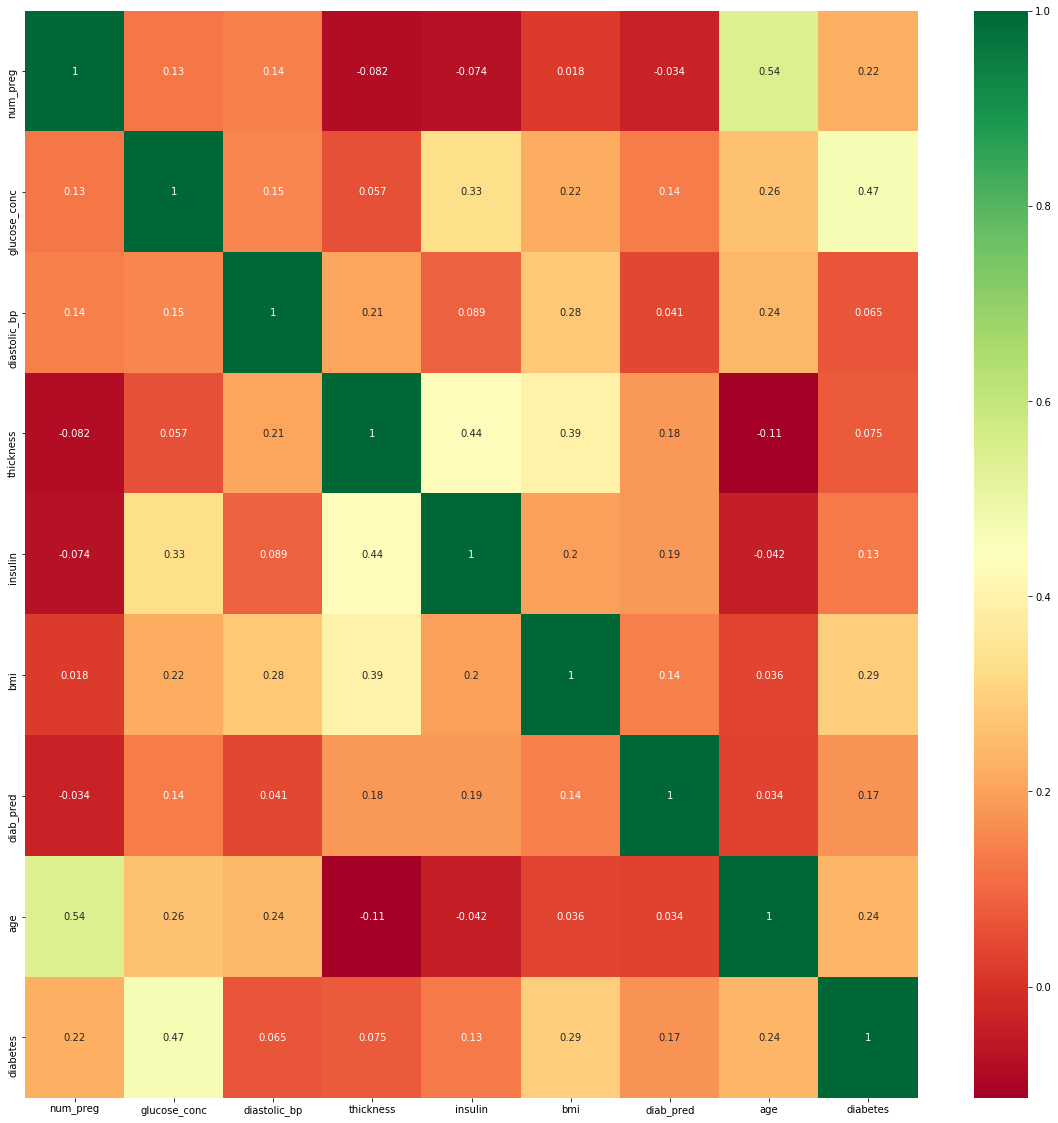

In [9]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

In [10]:
data.dtypes

num_preg          int64
glucose_conc      int64
diastolic_bp      int64
thickness         int64
insulin           int64
bmi             float64
diab_pred       float64
age               int64
diabetes          int64
dtype: object

In [11]:
from sklearn.model_selection import train_test_split
X=data.drop('diabetes',axis=1)
y=data.diabetes

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=10)

In [13]:
# Check how many other missing(zero) values
print("total number of rows : {}".format(len(data)))
print("number of rows missing glucose_conc: {}".format(len(data.loc[data['glucose_conc'] == 0])))
print("number of rows missing glucose_conc: {}".format(len(data.loc[data['glucose_conc'] == 0])))
print("number of rows missing diastolic_bp: {}".format(len(data.loc[data['diastolic_bp'] == 0])))
print("number of rows missing insulin: {}".format(len(data.loc[data['insulin'] == 0])))
print("number of rows missing bmi: {}".format(len(data.loc[data['bmi'] == 0])))
print("number of rows missing diab_pred: {}".format(len(data.loc[data['diab_pred'] == 0])))
print("number of rows missing age: {}".format(len(data.loc[data['age'] == 0])))

total number of rows : 768
number of rows missing glucose_conc: 5
number of rows missing glucose_conc: 5
number of rows missing diastolic_bp: 35
number of rows missing insulin: 374
number of rows missing bmi: 11
number of rows missing diab_pred: 0
number of rows missing age: 0


In [14]:
from sklearn.impute import SimpleImputer
fill_values = SimpleImputer(missing_values=0, strategy="mean")
X_train=fill_values.fit_transform(X_train)
X_test=fill_values.fit_transform(X_test)

In [15]:
# try for RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(random_state=10)
RFC.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [16]:
from sklearn import metrics
y_pred=RFC.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.7662337662337663

In [17]:
metrics.confusion_matrix(y_test,y_pred)

array([[130,  14],
       [ 40,  47]], dtype=int64)

In [18]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83       144
           1       0.77      0.54      0.64        87

    accuracy                           0.77       231
   macro avg       0.77      0.72      0.73       231
weighted avg       0.77      0.77      0.76       231



In [19]:
# Hyperparameter optimization
from sklearn.model_selection import RandomizedSearchCV

params={
    'n_estimators':[10,20,30,40,50,60,70,80,90,100,250,500,750,1000],
    'criterion':['gini','entropy'], 
    'max_depth':[3,4,5,6,8,10,12,15], 
    'max_features':['auto','sqrt','log2'],
    'bootstrap':[True, False],
}

random_search=RandomizedSearchCV(RFC,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,random_state=10)

In [20]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 250,
                                                         500, 750, 1000]},
                   random_state=10, scoring='roc_auc')

In [21]:
random_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                       random_state=10)

In [22]:
classifier=RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt',random_state=10)

In [23]:
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                       random_state=10)

In [24]:
y_pred=classifier.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.7402597402597403

In [25]:
metrics.confusion_matrix(y_test,y_pred)

array([[127,  17],
       [ 43,  44]], dtype=int64)

In [26]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       144
           1       0.72      0.51      0.59        87

    accuracy                           0.74       231
   macro avg       0.73      0.69      0.70       231
weighted avg       0.74      0.74      0.73       231



In [27]:
# try for xgboost
from xgboost import XGBClassifier

In [28]:
# Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05,0.10,0.15,0.20,0.25,0.30] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

classifier=XGBClassifier()

In [29]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3,random_state=10)

In [30]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.3s finished


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   random_state=10, scoring='roc_auc', verbose=3)

In [31]:
random_search.best_estimator_

XGBClassifier(colsample_bytree=0.4, gamma=0.2, learning_rate=0.05)

In [32]:
classifier=XGBClassifier(colsample_bytree=0.4, gamma=0.2, learning_rate=0.05)

In [33]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X_test,y_test,cv=10)

In [34]:
score

array([0.79166667, 0.69565217, 0.69565217, 0.82608696, 0.91304348,
       0.86956522, 0.91304348, 0.65217391, 0.60869565, 0.82608696])

In [35]:
score.mean()

0.7791666666666666

In [36]:
classifier.fit(X_train,y_train)

XGBClassifier(colsample_bytree=0.4, gamma=0.2, learning_rate=0.05)

In [37]:
y_pred=classifier.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.7489177489177489

In [38]:
metrics.confusion_matrix(y_test,y_pred)

array([[128,  16],
       [ 42,  45]], dtype=int64)

In [39]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.89      0.82       144
           1       0.74      0.52      0.61        87

    accuracy                           0.75       231
   macro avg       0.75      0.70      0.71       231
weighted avg       0.75      0.75      0.74       231



In [40]:
# dump model
import pickle

In [41]:
Pkl_Filename = "ml_model.pkl"  
with open(Pkl_Filename,'wb') as file:  
    pickle.dump(classifier,file)